In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('../datasets/testdata.csv',sep=',')
names=data.columns
print(names)

print(len(names))
cell_features=data.iloc[:,1:116].values
y=data.iloc[:,0].values

le=LabelEncoder()
y_true=le.fit_transform(y)

Index(['labelsC2', 'g.s', 'g.p', 'g.pdm', 'g.pdsd', 'g.effr', 'g.acirc',
       'g.sf', 'g.theta', 'g.l1',
       ...
       'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24'],
      dtype='object', length=116)
116


In [2]:
# class distribution
print(data.groupby('labelsC2').size())
# Estimate and visualize correlation
corrmat=data.corr(method='pearson')

labelsC2
a    1075
b     938
c    1508
l     875
o    1069
dtype: int64


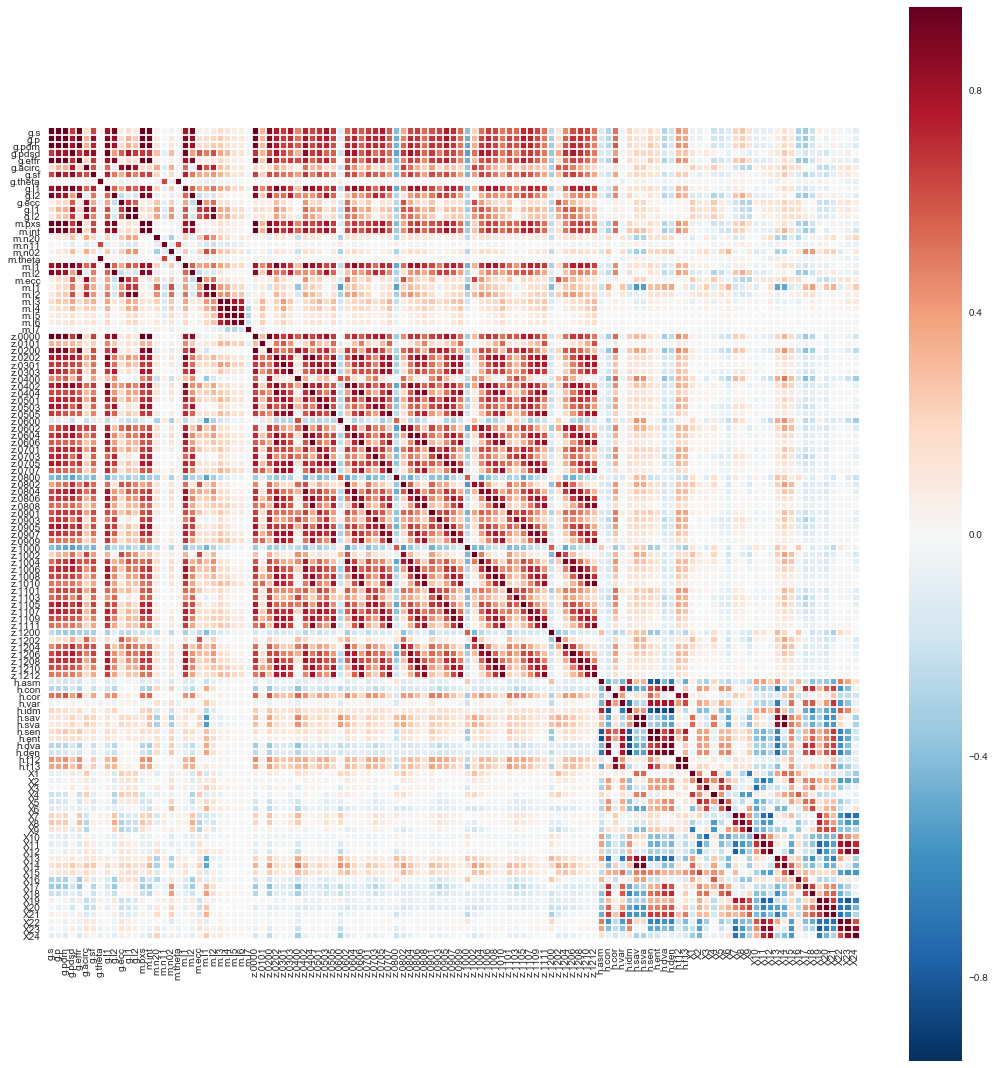

In [3]:
# Visualization of correlation
# Set up the matplotlib figure
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

#115 is the number of features(column) in the test dataset.csv excluding the labels 
for i in range(115):
    
        ax.axhline(i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()
plt.show()

In [6]:
#Normalize
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
test_size=0.2
seed=0

X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(cell_features,y_true,test_size=test_size,random_state=seed)


#Normalize training to improve performance
#we can use minmax scaling or standard scaler based scaling
stdSlr = StandardScaler().fit(X_train)
X_train = stdSlr.transform(X_train)

#Normalize test dataset same as training dataset
stdtestslr=StandardScaler().fit(X_test)
X_test=stdtestslr.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(4372, 115)
(1093, 115)


# K- Fold Cross Validation¶

1.Split the dataset into K equal partitions (or "folds").
2.Use fold 1 as the testing set and the union of the other folds as the training set.
3.Calculate testing accuracy.
4.Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5.Use the average testing accuracy as the estimate of accuracy on the test dataset. 

Usually a 5 0r 10 fold cross validation is recommended standard.


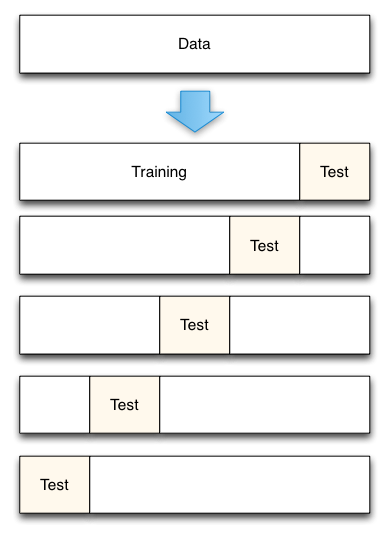

In [8]:
from IPython.display import Image,display
Image(filename='../images/cross_validation_diagram.png')

LR: 0.862990 (0.015247)
LDA: 0.847664 (0.013024)
KNN: 0.794363 (0.018705)
CART: 0.775383 (0.025294)
NB: 0.597212 (0.020620)
SVM: 0.866190 (0.018624)


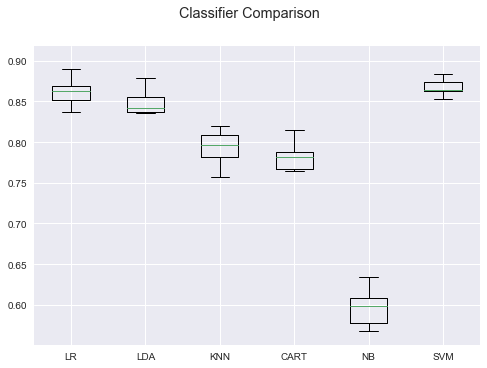

In [10]:
import warnings
warnings.filterwarnings("ignore")



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
num_folds=10
num_instances=len(X_train)
seed=0
scoring = 'accuracy'
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



# Visualization through boxplot for comparison of Classifier 
fig = plt.figure()
fig.suptitle('Classifier Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Summary:

In this above example you discovered how to evaluate multiple machine learning algorithms
on a dataset in Python with scikit-learn. You learned how to use the same test harness to
evaluate the algorithms and how to summarize the results both numerically and using a box
and whisker plot. You can use this above recipe as a template for evaluating multiple algorithms on
your own problems.

# Linear and Non Linear classifier design for the test dataset

Using the cross validation helps to estimate the unknown hyper-parameters that are best parameters to fine tune the model

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn import svm
import numpy as np

linear_clf=svm.SVC(kernel='linear',C=10).fit(X_train,Y_train)
print("Linear classifier score with C =10 is :",linear_clf.score(X_train, np.array(Y_train)))

linear_clf8=svm.SVC(kernel='linear',C=8).fit(X_train,Y_train)
print("Linear classifier score with C =8 is :",linear_clf8.score(X_train, np.array(Y_train)))

svcpoly=svm.SVC(kernel='poly',degree=3).fit(X_train,np.array(Y_train))
print (svcpoly)
print("Polynomial classifier score is :",svcpoly.score(X_train, np.array(Y_train)))

svcrbf=svm.SVC(kernel='rbf').fit(X_train,np.array(Y_train))
print (svcrbf)

cv = cross_validation.StratifiedKFold(y=Y_train, n_folds=5)
print (cv) 
c_range = 2.0 ** np.arange(-2, 9)
gamma_range = 2.0 ** np.arange(-5, 4)
param_grid = dict(gamma=gamma_range, C=c_range, kernel=['rbf'])
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, n_jobs=1, cv=cv, verbose=True)
grid.fit(X_train, np.array(Y_train))
clf1 = svm.SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma).fit(X_train, np.array(Y_train))
print (grid.best_estimator_.C)
print (grid.best_estimator_.gamma)
print (grid.score)


print("RBF classifier score is :",clf1.score(X_train, np.array(Y_train)))
print("RBF classifier score is :",clf1.score(X_test, np.array(Y_test)))

Linear classifier score with C =10 is : 0.919945105215
Linear classifier score with C =8 is : 0.919487648673
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Polynomial classifier score is : 0.85384263495
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
sklearn.cross_validation.StratifiedKFold(labels=[1 1 0 ..., 3 3 1], n_folds=5, shuffle=False, random_state=None)
Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed: 30.8min finished


2.0
0.03125
<bound method BaseSearchCV.score of GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 3 1], n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([ 0.03125,  0.0625 ,  0.125  ,  0.25   ,  0.5    ,  1.     ,
        2.     ,  4.     ,  8.     ]), 'C': array([  2.50000e-01,   5.00000e-01,   1.00000e+00,   2.00000e+00,
         4.00000e+00,   8.00000e+00,   1.60000e+01,   3.20000e+01,
         6.40000e+01,   1.28000e+02,   2.56000e+02]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)>
RBF classifier score is : 0.979185727356
RBF classifier score is : 0.855443732845


In [18]:
y_pred=clf1.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(Y_test,y_pred)
print(cnf_matrix)
print(classification_report(Y_test, y_pred))

[[197  14   1   3   2]
 [  4 138   4  11  26]
 [  0  16 279   4   1]
 [  3  17   6 150   5]
 [  2  32   2   5 171]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.93       217
          1       0.64      0.75      0.69       183
          2       0.96      0.93      0.94       300
          3       0.87      0.83      0.85       181
          4       0.83      0.81      0.82       212

avg / total       0.86      0.86      0.86      1093



To do for participants
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)


Calculate the best configuration and accuracy for the c_values,kernel_values given above and print accuracy for each combination.Upload your solutions or email us your jupyter Notebook files.